In [1]:
# Importando frameworks e bibliotecas
import pandas as pd

In [ ]:
# Carregando os datasets no Pandas
ceis = pd.read_csv("Datasets/CEIS.csv", sep=";", engine="python", encoding="ISO-8859-1", error_bad_lines=False)
estados = pd.read_csv("Datasets/IBGE_Estados.csv", sep=";", engine="python", encoding="ISO-8859-1", error_bad_lines=False)

### Quantitativo de empresas inidôneas e suspeitas por Estado

<AxesSubplot:>

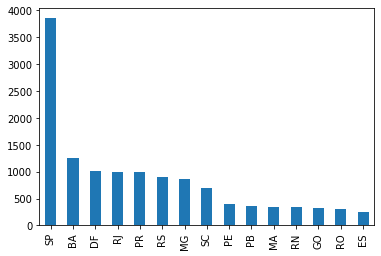

In [13]:
ceis['UF ÓRGÃO SANCIONADOR'].value_counts()[:15].plot(kind='bar')